<a href="https://colab.research.google.com/github/mslucke99/document-reader/blob/main/BARCODE_SCANNER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Runtime --> Change Runtime Type --> Hardware accelerator --> GPU


# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 10623, done.
remote: Total 10623 (delta 0), reused 0 (delta 0), pack-reused 10623
Receiving objects: 100% (10623/10623), 10.79 MiB | 11.05 MiB/s, done.
Resolving deltas: 100% (7340/7340), done.
/content/yolov5


In [4]:
# install dependencies as necessary
!pip install -qr requirements.txt
!pip install wandb
import torch

from IPython.display import Image, clear_output  # to display images
#from utils.google_utils import gdrive_download  # to download models/datasets
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))


     |████████████████████████████████| 596 kB 15.2 MB/s 
     |████████████████████████████████| 1.7 MB 15.0 MB/s 
     |████████████████████████████████| 142 kB 75.1 MB/s 
     |████████████████████████████████| 180 kB 73.4 MB/s 
     |████████████████████████████████| 97 kB 8.3 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-py3-none-any.whl size=6502 sha256=7bc80065e18d4ab483093b7994ee276638fa14dcda17cd773cdb4fa9af039d19
  Stored in directory: /root/.cache/pip/wheels/50/ca/fa/8fca8d246e64f19488d07567547ddec8eb084e8c0d7a59226a
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=6cdfd847580aa9cb41d2e228eeff632d6805126338550105d53d57925c31e5ee
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built subprocess32 pathtools
Setup complete. Using torch 1.10.0+cu111 _CudaDeviceProperties(name='Tesla T4', majo

detect: weights=['yolov5s.pt'], source=data/images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-206-gc43439a torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

100% 14.0M/14.0M [00:01<00:00, 10.9MB/s]

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, Done. (0.015s)
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 1 tie, Done. (0.022s)
Speed: 0.4ms pre-process, 18.6ms inference, 18.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


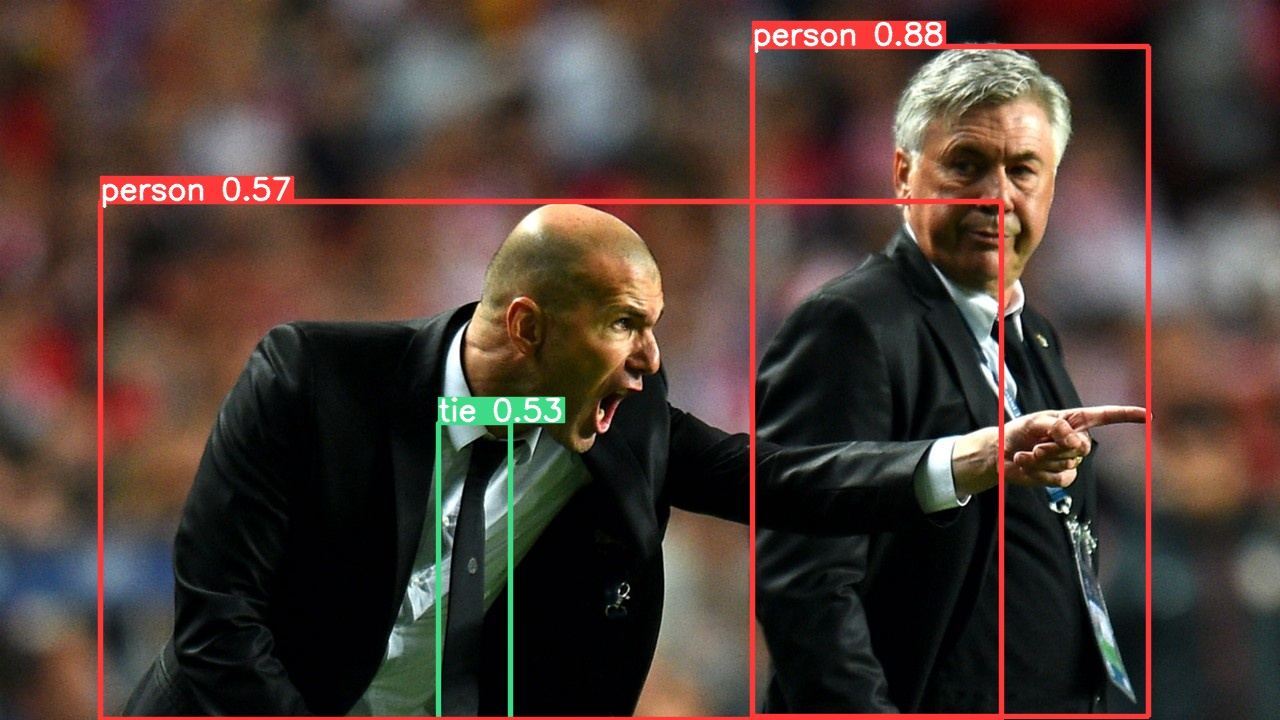

In [5]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images/
Image(filename="runs/detect/exp/zidane.jpg",width=600) 

In [6]:
!pip install -q roboflow
from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook="roboflow-yolov5")

     |████████████████████████████████| 145 kB 15.1 MB/s 
     |████████████████████████████████| 178 kB 78.2 MB/s 
     |████████████████████████████████| 1.1 MB 68.1 MB/s 
     |████████████████████████████████| 67 kB 7.4 MB/s 
     |████████████████████████████████| 138 kB 81.3 MB/s 
     |████████████████████████████████| 63 kB 2.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=roboflow-yolov5


In [8]:
%cd /content/yolov5
#after following the link above, recieve python code with these fields filled in
from roboflow import Roboflow
rf = Roboflow(api_key="6gaOZjjZTVGzwJPDh3Tr")
project = rf.workspace().project("barcodedetection-v2")
dataset = project.version("1").download("yolov5")

/content/yolov5
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to BarcodeDetection-v2-1 in yolov5pytorch:: 100%|██████████| 3398/3398 [00:02<00:00, 1619.01it/s]


In [9]:
%cat {dataset.location}/data.yaml


names:
- '0'
- '1'
nc: 2
train: BarcodeDetection-v2-1/train/images
val: BarcodeDetection-v2-1/valid/images


In [13]:
%%time
%cd /content/yolov5/
!python train.py --img 416 \
--project custom_yolov5 \
--batch 16 \
--epochs 100 \
--weights yolov5s.pt \
--data {dataset.location}/data.yaml \
--save-period 20


/content/yolov5
wandb: Currently logged in as: larfer2001 (use `wandb login --relogin` to force relogin)
train: weights=yolov5s.pt, cfg=, data=/content/yolov5/BarcodeDetection-v2-1/data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=custom_yolov5, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=20, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-206-gc43439a torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, c

In [24]:
%cd /content/yolov5/
!python detect.py --weights custom_yolov5/exp/weights/best.pt --img 416 --conf 0.4 --source ./BarcodeDetection-v2-1/test/images

/content/yolov5
detect: weights=['custom_yolov5/exp/weights/best.pt'], source=./BarcodeDetection-v2-1/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-206-gc43439a torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/71 /content/yolov5/BarcodeDetection-v2-1/test/images/20201211_1025_rgb_png.rf.9c9f969c9eb881ac4aa96a0b10ca58f5.jpg: 416x416 1 1, Done. (0.014s)
image 2/71 /content/yolov5/BarcodeDetection-v2-1/test/images/20201211_102_rgb_png.rf.edbb4179bb58e11f9f59da6ada4d4dfb.jpg: 416x416 1 0, 1 1, Done. (0.014s)
image 3/71 /content/yolov5/Barco

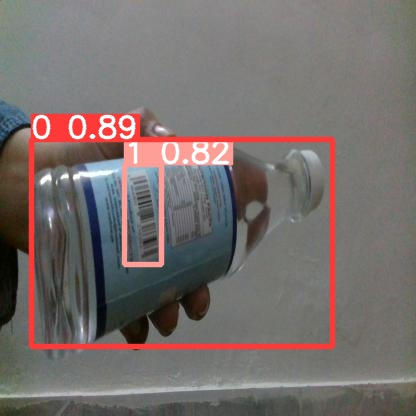

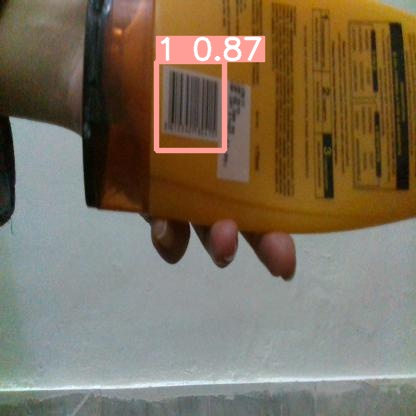

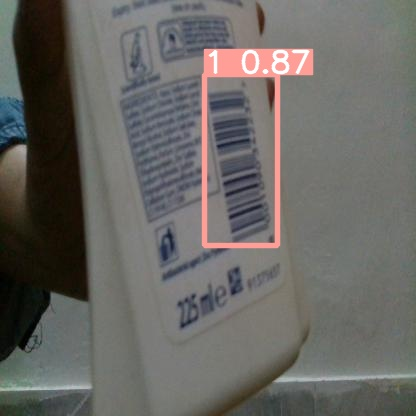

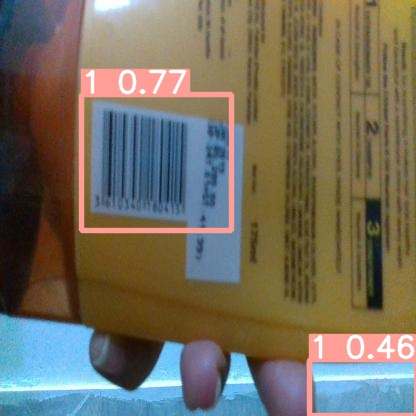

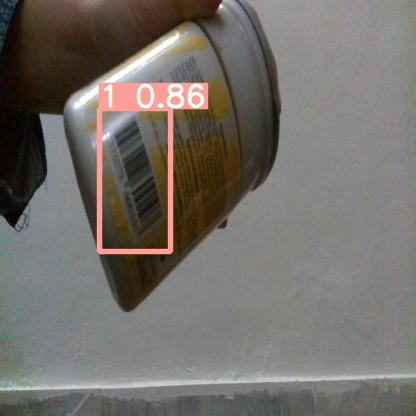

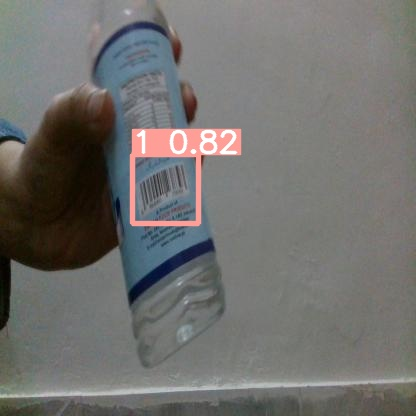

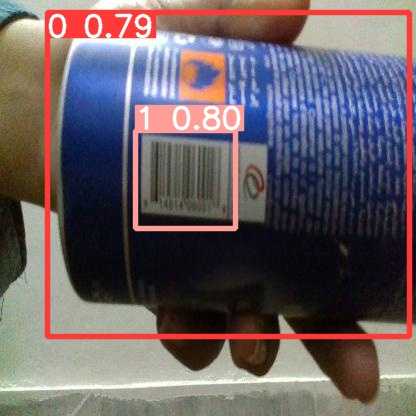

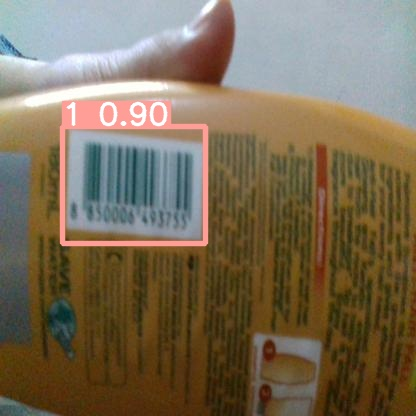

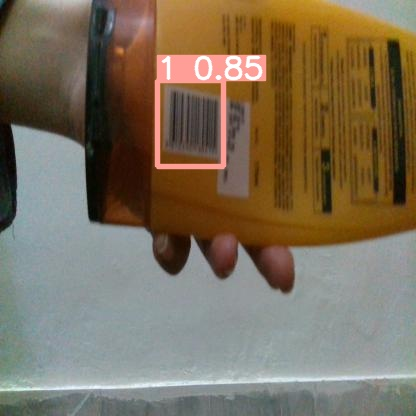

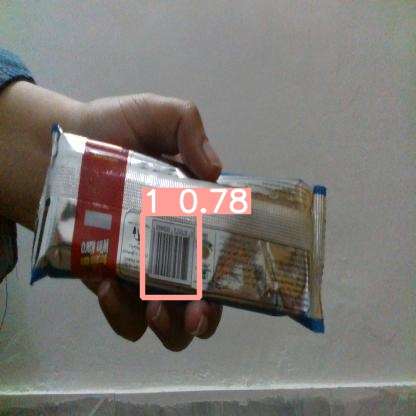

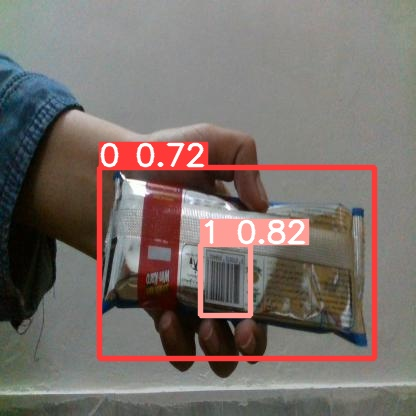

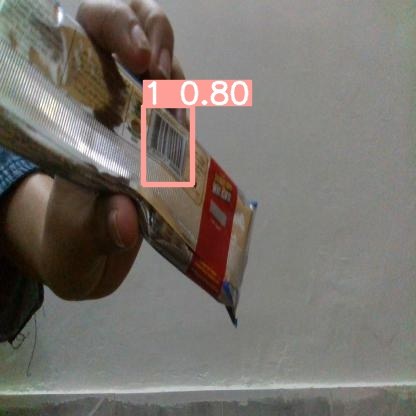

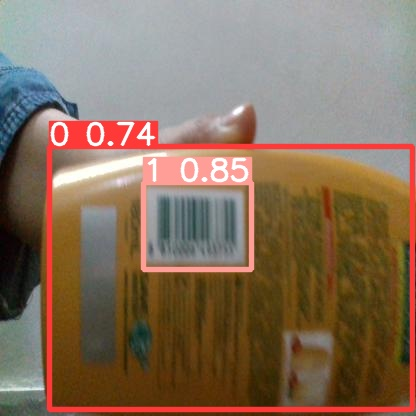

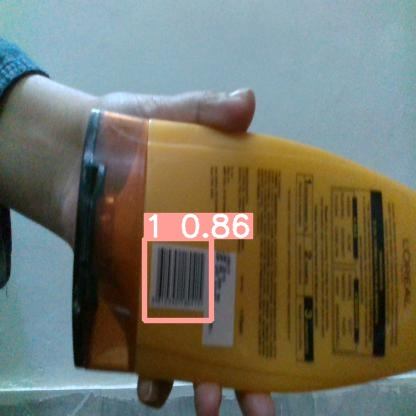

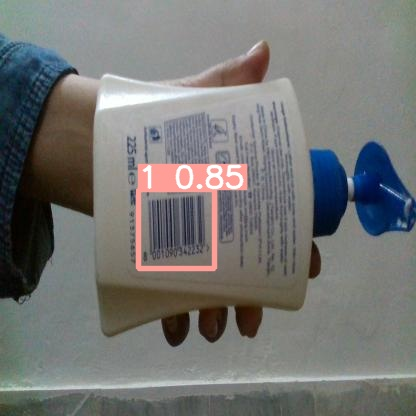

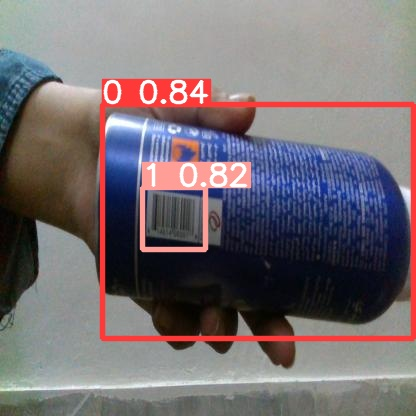

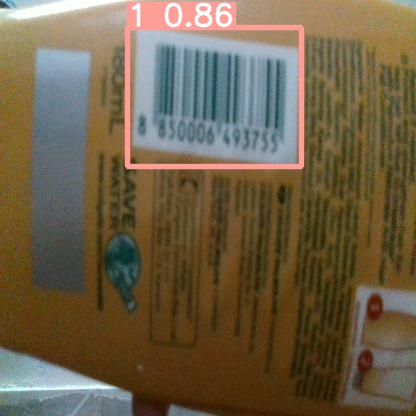

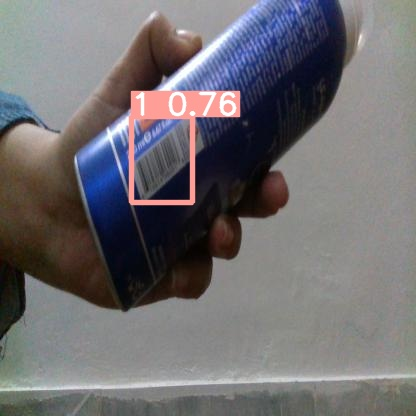

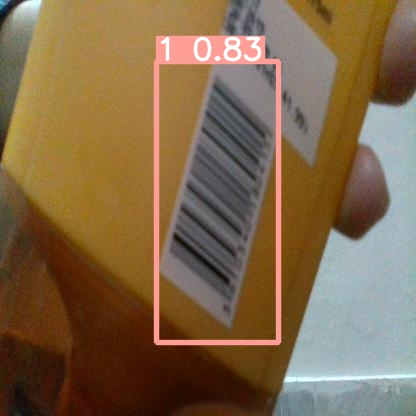

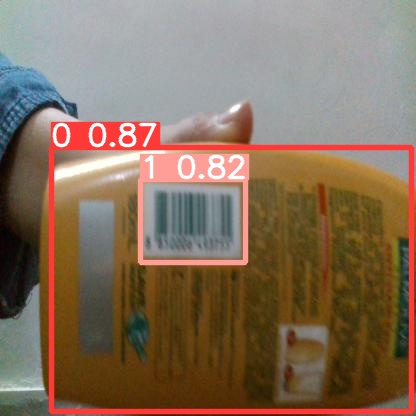

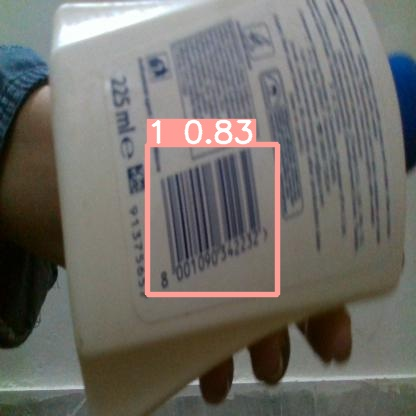

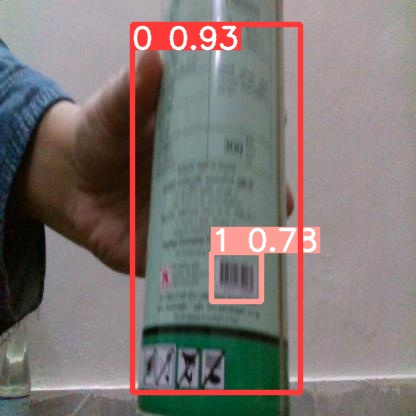

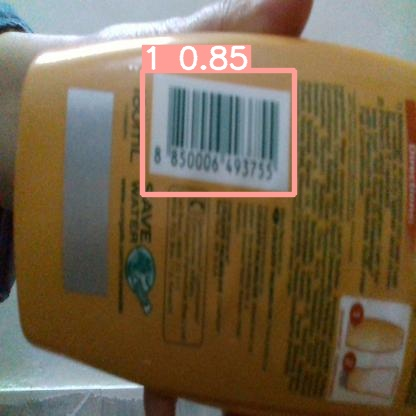

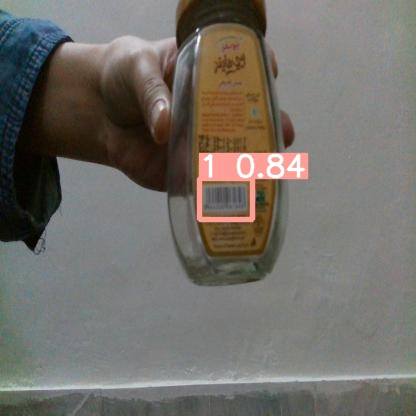

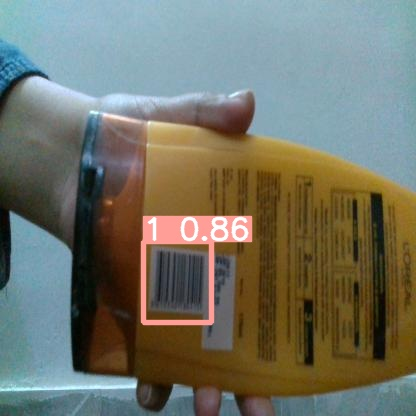

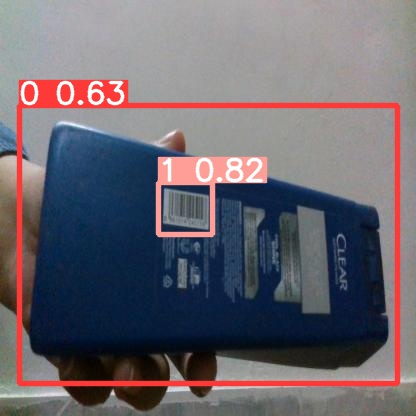

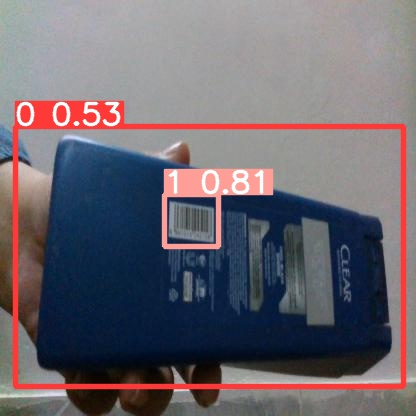

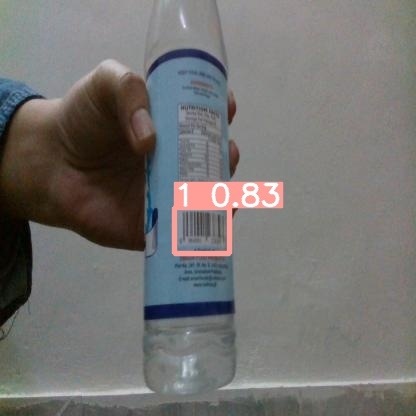

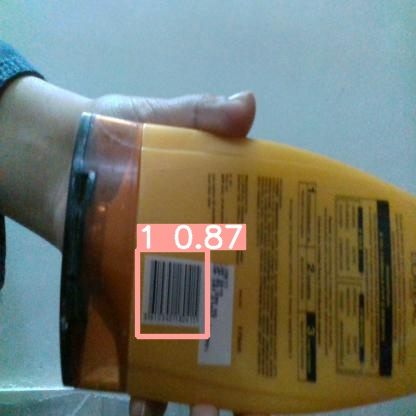

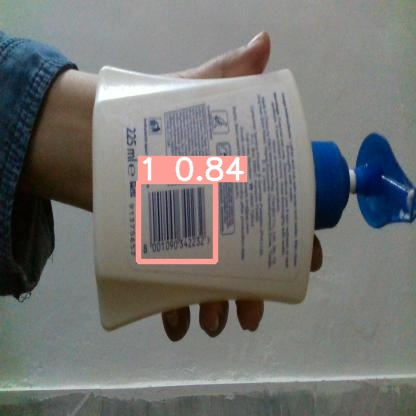

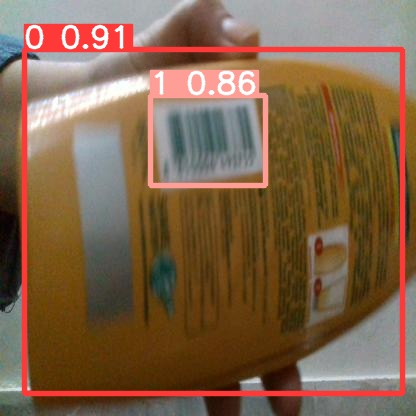

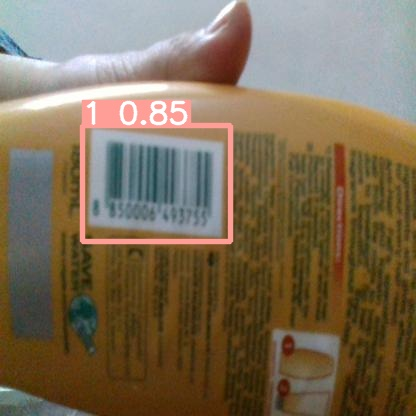

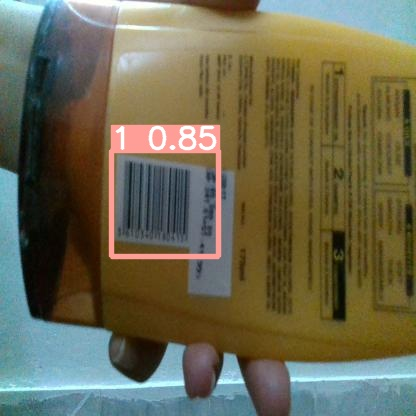

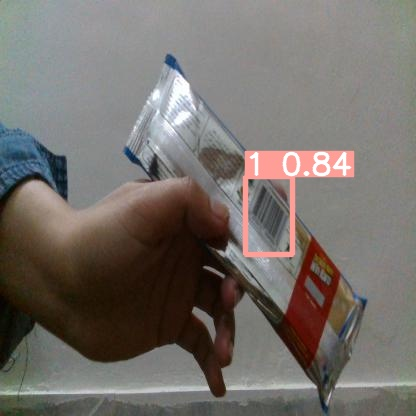

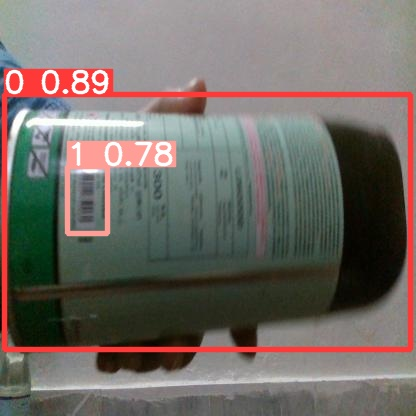

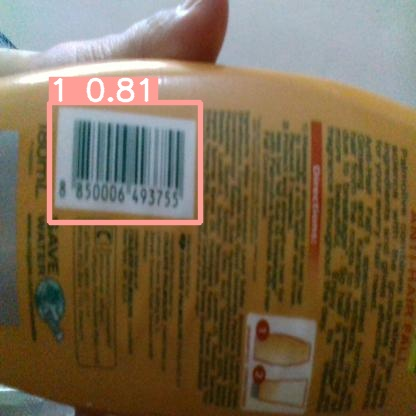

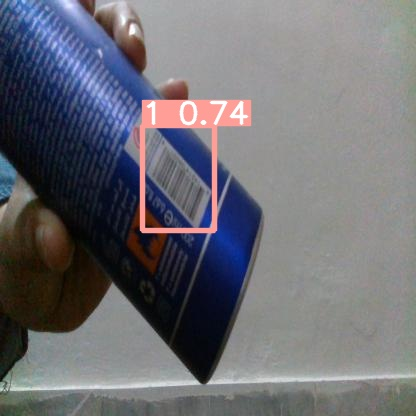

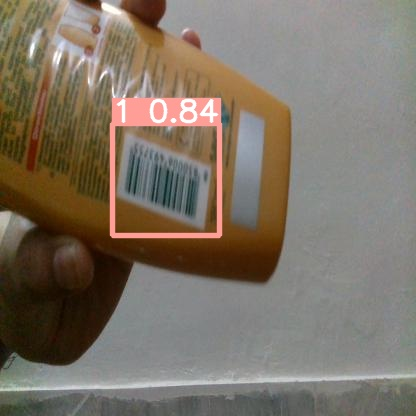

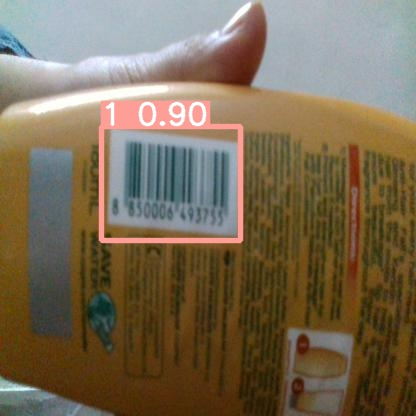

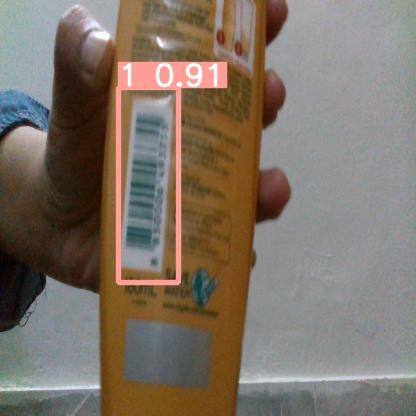

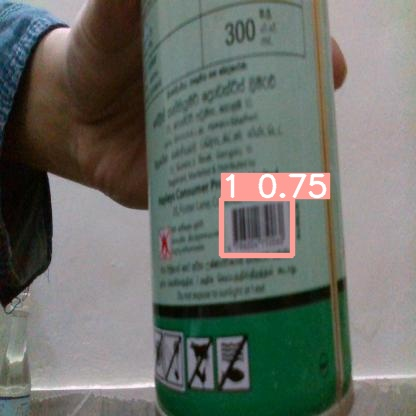

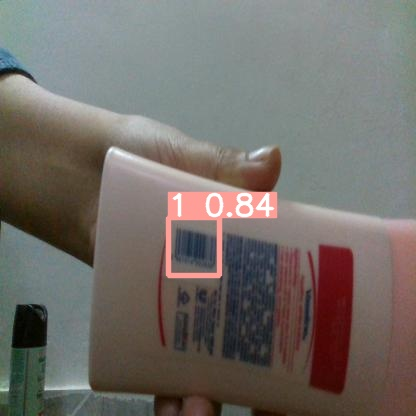

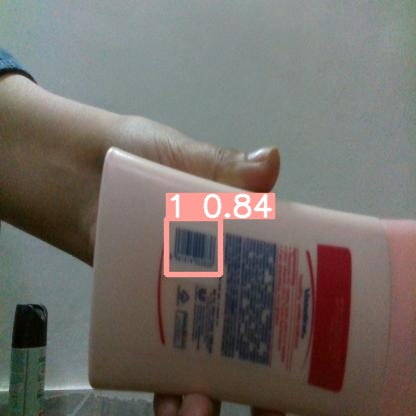

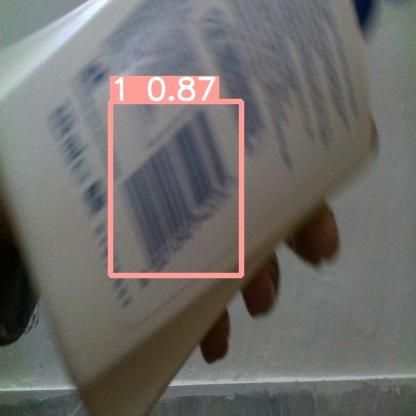

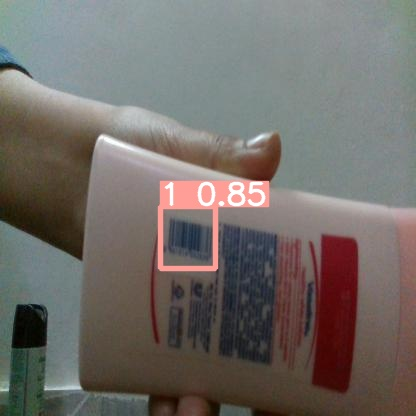

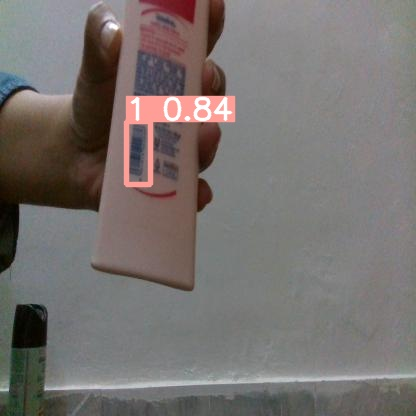

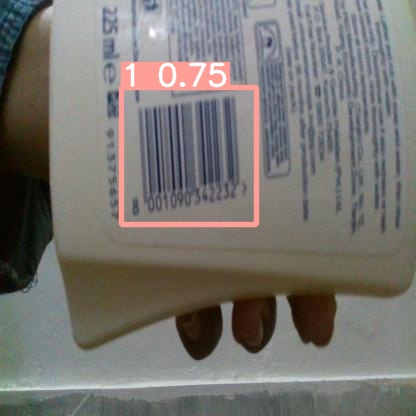

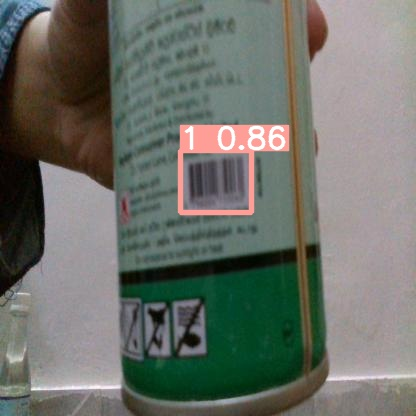

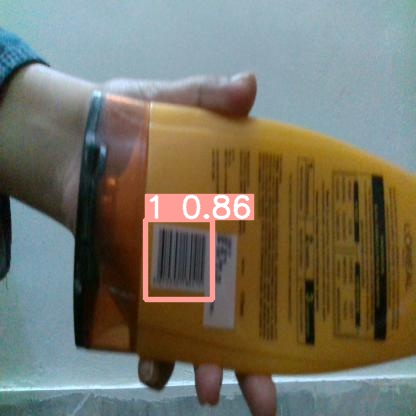

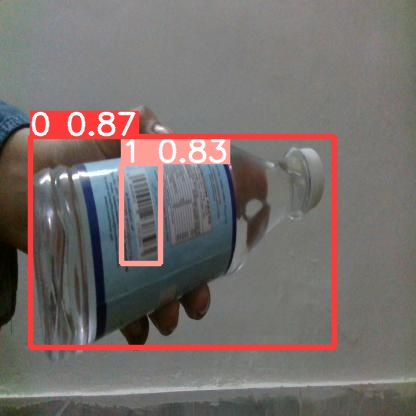

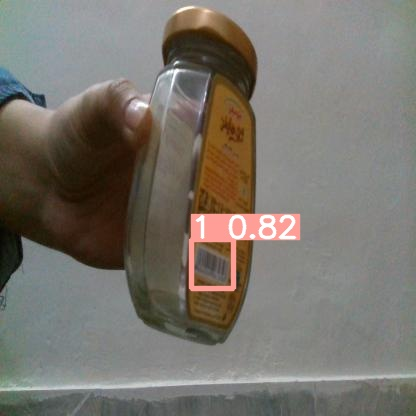

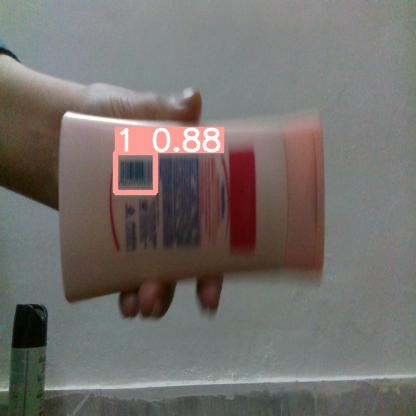

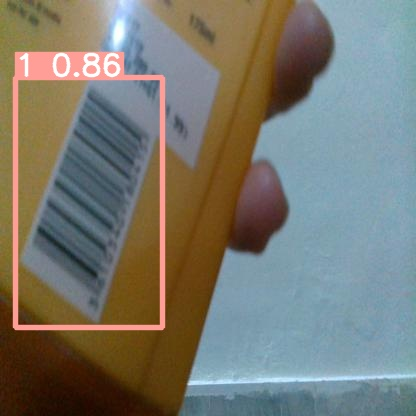

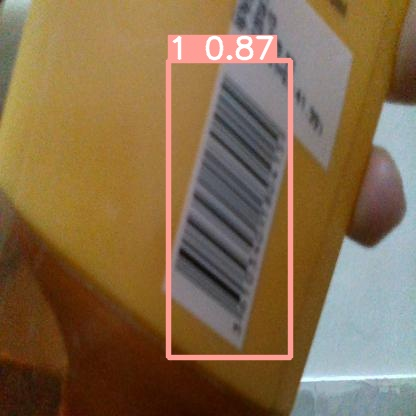

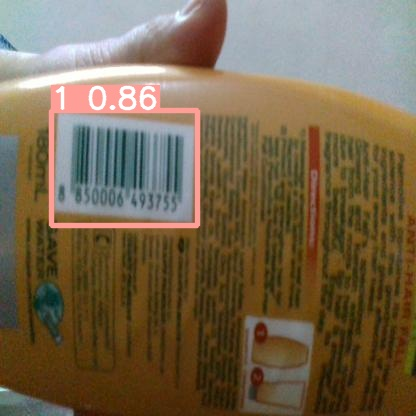

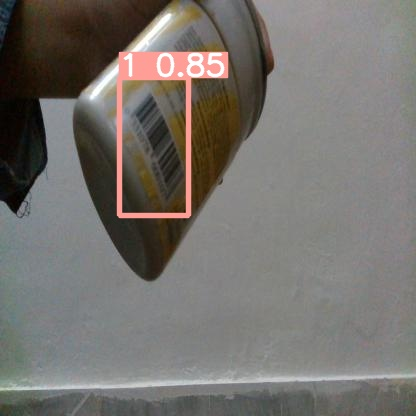

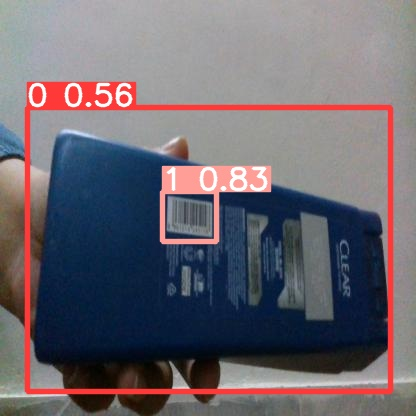

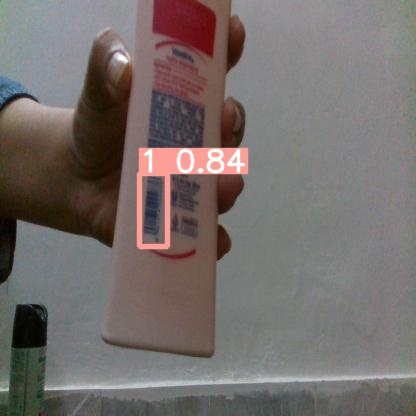

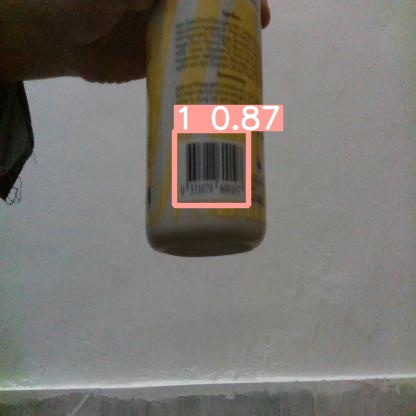

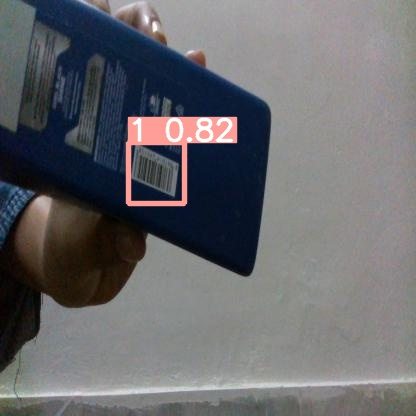

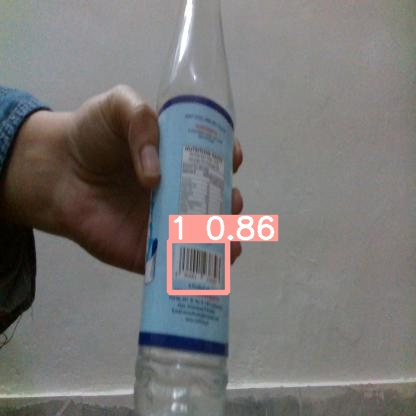

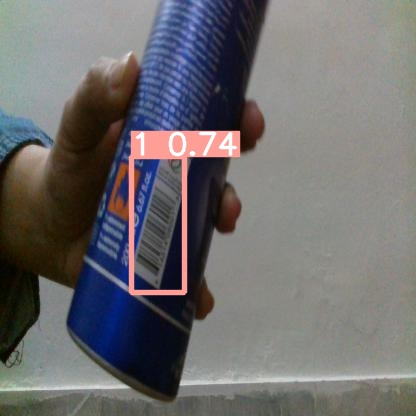

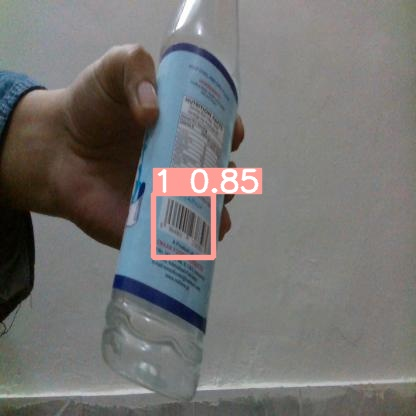

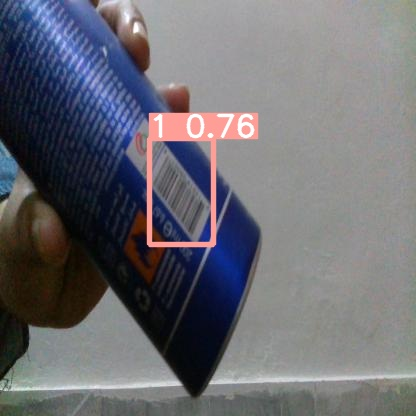

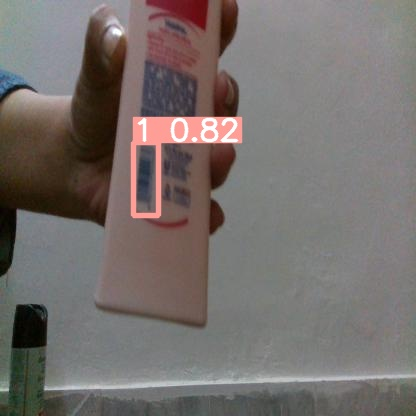

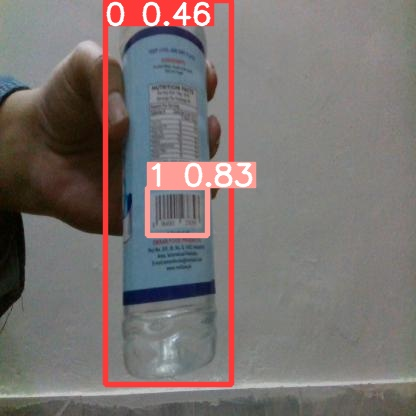

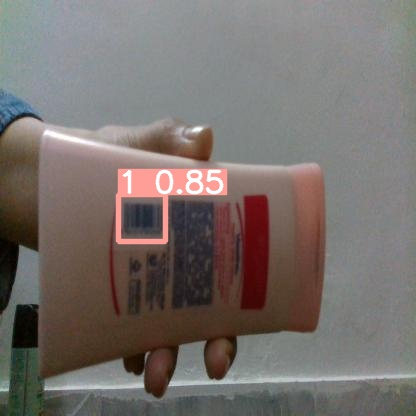

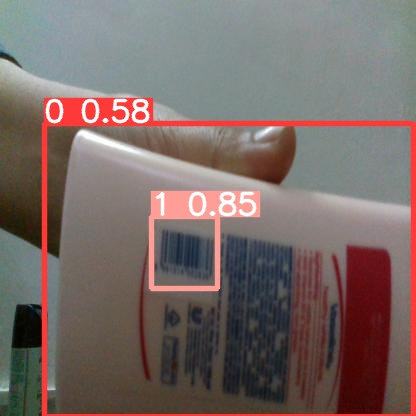

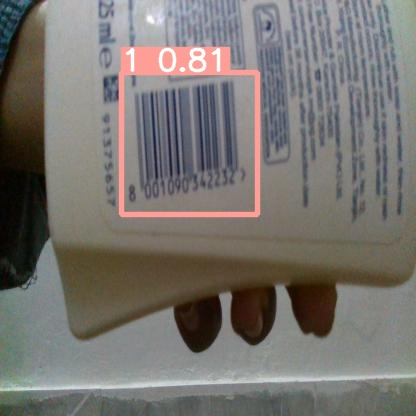

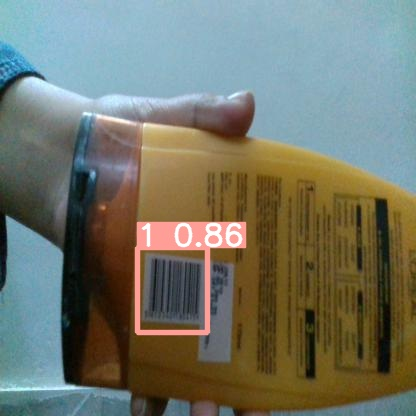

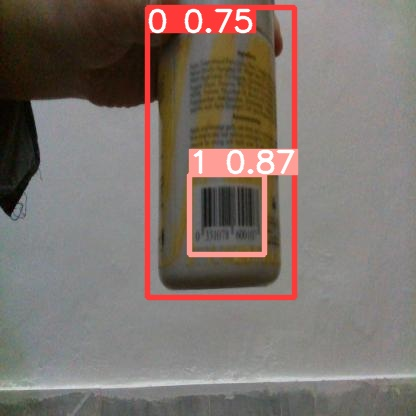

In [25]:
#display inference on ALL test images
#this looks much better with longer training above

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp4/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")